In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
df = pd.read_csv('Employee_productivity.csv')

In [4]:
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (300, 7)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HoursWorked          300 non-null    float64
 1   FocusScore           300 non-null    float64
 2   ProductivityScore    300 non-null    float64
 3   Department           300 non-null    object 
 4   YearsAtCompany       300 non-null    int64  
 5   TeamMeetingsPerWeek  300 non-null    int64  
 6   DeskLocation         300 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 16.5+ KB
None

First few rows:
   HoursWorked  FocusScore  ProductivityScore   Department  YearsAtCompany  \
0         42.4         6.3            3127.96  Engineering              17   
1         34.0         7.2            4742.60           HR               8   
2         47.2         5.6            2044.73        Sales              15   
3   


PART 1: LINEAR RELATIONSHIPS WITH PRODUCTIVITY


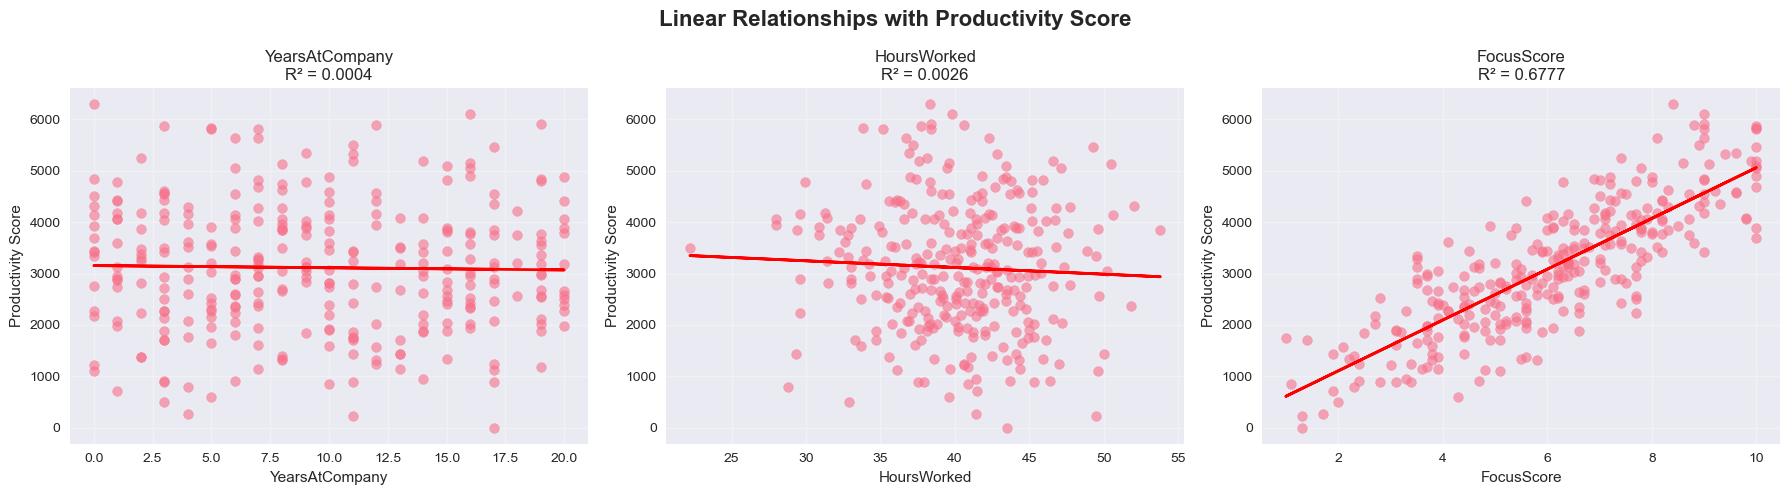


R-squared values for linear relationships with Productivity:
FocusScore: R² = 0.6777
HoursWorked: R² = 0.0026
YearsAtCompany: R² = 0.0004

Strongest linear relationship: FocusScore (R² = 0.6777)


In [8]:
print("\n" + "="*80)
print("PART 1: LINEAR RELATIONSHIPS WITH PRODUCTIVITY")
print("="*80)
features_to_analyze = ['YearsAtCompany', 'HoursWorked', 'FocusScore']
target = 'ProductivityScore'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Linear Relationships with Productivity Score', fontsize=16, fontweight='bold')
r_squared_values = {}

for i, feature in enumerate(features_to_analyze):
    # Create scatter plot
    axes[i].scatter(df[feature], df[target], alpha=0.6, s=50)
    
    # Fit linear regression
    X = df[feature].values.reshape(-1, 1)
    y = df[target].values
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate R-squared
    r_squared = r2_score(y, y_pred)
    r_squared_values[feature] = r_squared
    
    # Add regression line
    axes[i].plot(df[feature], y_pred, color='red', linewidth=2)
    
    # Formatting
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Productivity Score')
    axes[i].set_title(f'{feature}\nR² = {r_squared:.4f}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
# Print R-squared values
print("\nR-squared values for linear relationships with Productivity:")
for feature, r_squared in sorted(r_squared_values.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: R² = {r_squared:.4f}")

strongest_feature = max(r_squared_values, key=r_squared_values.get)
print(f"\nStrongest linear relationship: {strongest_feature} (R² = {r_squared_values[strongest_feature]:.4f})")


PART 2: COMPREHENSIVE PRODUCTIVITY MODEL
Unique values in categorical columns:
Department: ['Engineering' 'HR' 'Sales' 'Marketing']
DeskLocation: ['Open Plan' 'Private Office' 'Remote']


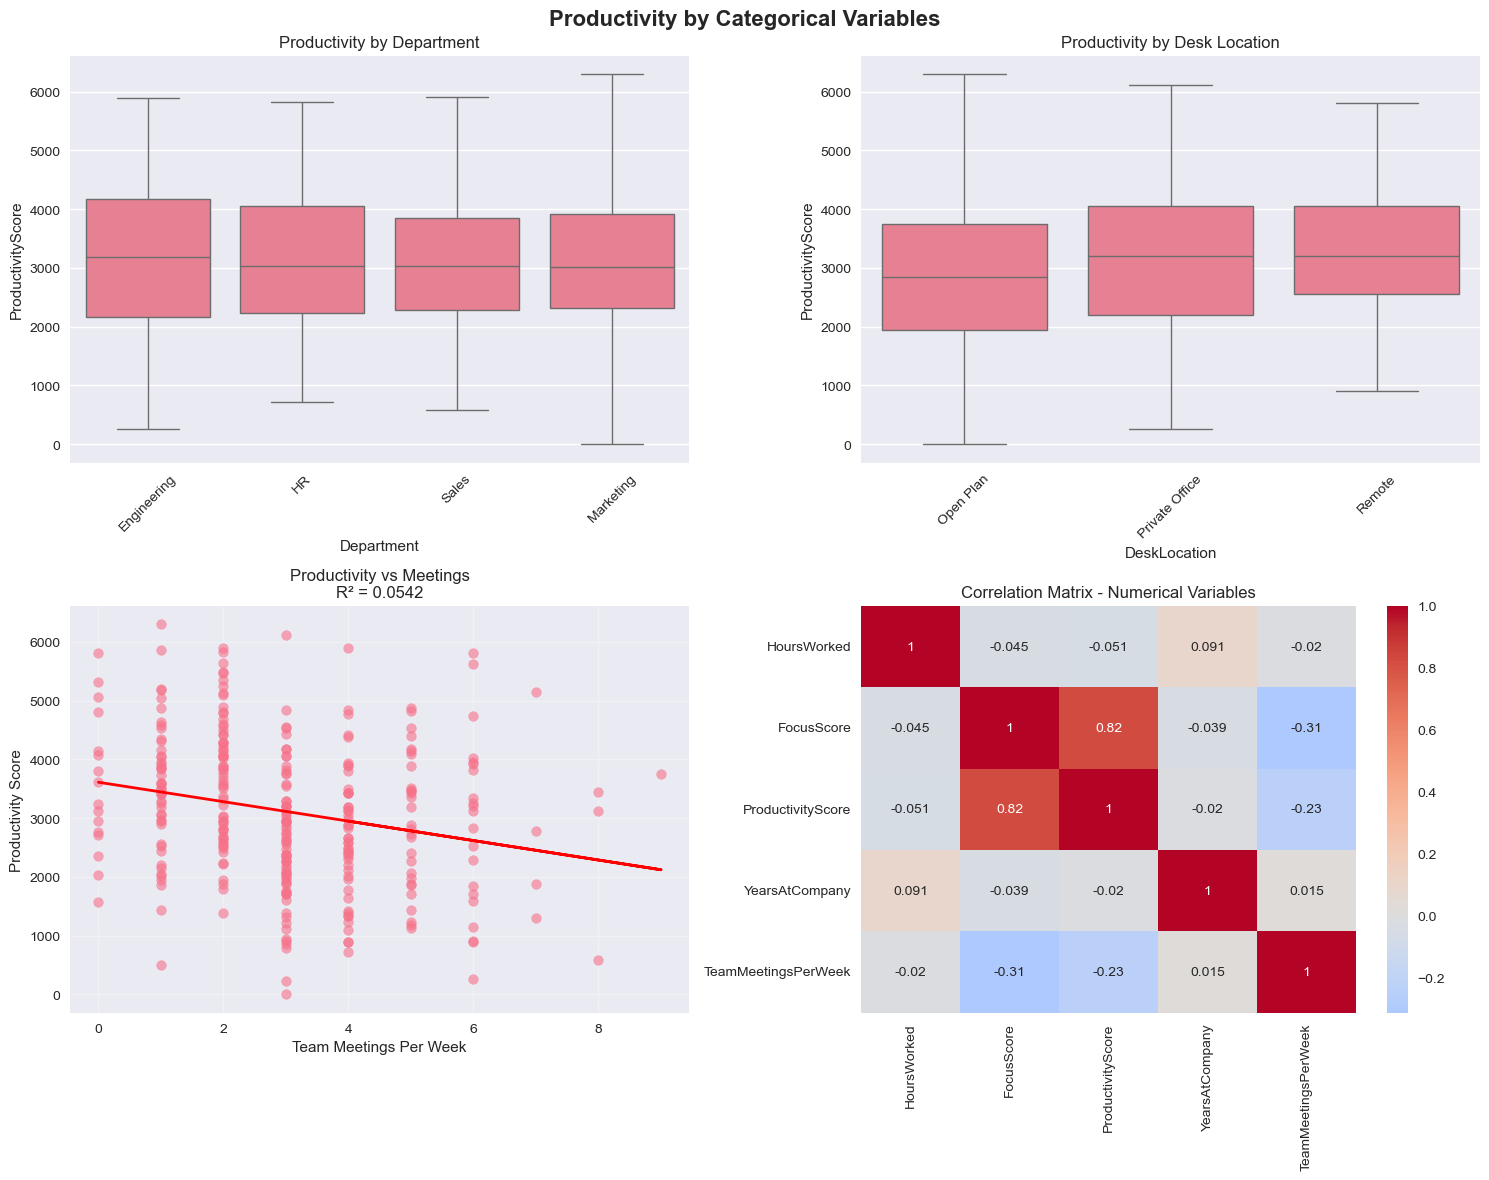


Individual R-squared values for all features:
YearsAtCompany: R² = 0.0004
HoursWorked: R² = 0.0026
FocusScore: R² = 0.6777
TeamMeetingsPerWeek: R² = 0.0542
Department (encoded): R² = 0.0007
DeskLocation (encoded): R² = 0.0175

------------------------------------------------------------
COMPREHENSIVE MULTIPLE REGRESSION MODEL
------------------------------------------------------------
Multiple Regression R² = 0.6838

Feature Coefficients:
HoursWorked: -3.53
FocusScore: 512.09
YearsAtCompany: 2.98
TeamMeetingsPerWeek: 26.91
Department_encoded: -19.15
DeskLocation_encoded: -111.02
Intercept: 177.45


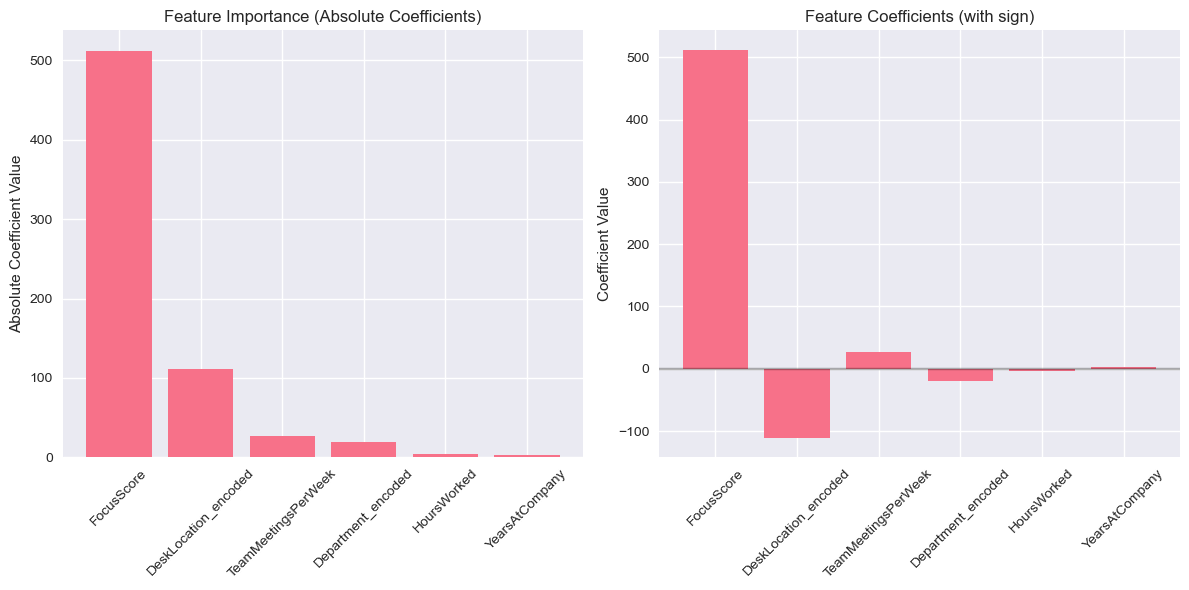

In [9]:
print("\n" + "="*80)
print("PART 2: COMPREHENSIVE PRODUCTIVITY MODEL")
print("="*80)

# Analyze categorical variables
print("Unique values in categorical columns:")
categorical_cols = ['Department', 'DeskLocation']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# Visualize relationships with categorical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Productivity by Categorical Variables', fontsize=16, fontweight='bold')

# Department boxplot
sns.boxplot(data=df, x='Department', y='ProductivityScore', ax=axes[0,0])
axes[0,0].set_title('Productivity by Department')
axes[0,0].tick_params(axis='x', rotation=45)

# DeskLocation boxplot
sns.boxplot(data=df, x='DeskLocation', y='ProductivityScore', ax=axes[0,1])
axes[0,1].set_title('Productivity by Desk Location')
axes[0,1].tick_params(axis='x', rotation=45)

# TeamMeetingsPerWeek scatter plot
axes[1,0].scatter(df['TeamMeetingsPerWeek'], df['ProductivityScore'], alpha=0.6)
X_meetings = df['TeamMeetingsPerWeek'].values.reshape(-1, 1)
model_meetings = LinearRegression()
model_meetings.fit(X_meetings, df['ProductivityScore'])
y_pred_meetings = model_meetings.predict(X_meetings)
axes[1,0].plot(df['TeamMeetingsPerWeek'], y_pred_meetings, color='red', linewidth=2)
r2_meetings = r2_score(df['ProductivityScore'], y_pred_meetings)
axes[1,0].set_xlabel('Team Meetings Per Week')
axes[1,0].set_ylabel('Productivity Score')
axes[1,0].set_title(f'Productivity vs Meetings\nR² = {r2_meetings:.4f}')
axes[1,0].grid(True, alpha=0.3)

# Correlation heatmap for numerical variables
numerical_cols = ['HoursWorked', 'FocusScore', 'ProductivityScore', 'YearsAtCompany', 'TeamMeetingsPerWeek']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix - Numerical Variables')

plt.tight_layout()
plt.show()

# Calculate R-squared for all features individually
print("\nIndividual R-squared values for all features:")

# Numerical features
all_features = ['YearsAtCompany', 'HoursWorked', 'FocusScore', 'TeamMeetingsPerWeek']
feature_r2 = {}

for feature in all_features:
    X = df[feature].values.reshape(-1, 1)
    y = df['ProductivityScore'].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    feature_r2[feature] = r2
    print(f"{feature}: R² = {r2:.4f}")

# For categorical variables, let's look at variance explained
from sklearn.preprocessing import LabelEncoder

for cat_col in categorical_cols:
    le = LabelEncoder()
    X_encoded = le.fit_transform(df[cat_col]).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X_encoded, df['ProductivityScore'])
    y_pred = model.predict(X_encoded)
    r2 = r2_score(df['ProductivityScore'], y_pred)
    feature_r2[cat_col] = r2
    print(f"{cat_col} (encoded): R² = {r2:.4f}")

# Build a comprehensive multiple regression model
print("\n" + "-"*60)
print("COMPREHENSIVE MULTIPLE REGRESSION MODEL")
print("-"*60)

# Prepare data for multiple regression
X_multi = df[['HoursWorked', 'FocusScore', 'YearsAtCompany', 'TeamMeetingsPerWeek']].copy()

# Encode categorical variables
le_dept = LabelEncoder()
le_location = LabelEncoder()

X_multi['Department_encoded'] = le_dept.fit_transform(df['Department'])
X_multi['DeskLocation_encoded'] = le_location.fit_transform(df['DeskLocation'])

# Fit comprehensive model
multi_model = LinearRegression()
multi_model.fit(X_multi, df['ProductivityScore'])
y_pred_multi = multi_model.predict(X_multi)
r2_multi = r2_score(df['ProductivityScore'], y_pred_multi)

print(f"Multiple Regression R² = {r2_multi:.4f}")
print("\nFeature Coefficients:")
feature_names = X_multi.columns
coefficients = multi_model.coef_
for name, coeff in zip(feature_names, coefficients):
    print(f"{name}: {coeff:.2f}")

print(f"Intercept: {multi_model.intercept_:.2f}")

# Feature importance visualization
plt.figure(figsize=(12, 6))
abs_coeffs = np.abs(coefficients)
sorted_idx = np.argsort(abs_coeffs)[::-1]

plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients)), abs_coeffs[sorted_idx])
plt.xticks(range(len(coefficients)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.title('Feature Importance (Absolute Coefficients)')
plt.ylabel('Absolute Coefficient Value')

plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients)), coefficients[sorted_idx])
plt.xticks(range(len(coefficients)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.title('Feature Coefficients (with sign)')
plt.ylabel('Coefficient Value')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


In [10]:
print("\n" + "="*80)
print("PART 3: ANALYSIS SUMMARY AND RECOMMENDATIONS")
print("="*80)

# Analyze means by categories for insights
print("PRODUCTIVITY INSIGHTS:")
print("-" * 40)

print("\n1. Focus Score Analysis:")
print(f"   - Focus has the strongest individual relationship with productivity (R² = {r_squared_values['FocusScore']:.4f})")
print(f"   - Correlation with productivity: {df[['FocusScore', 'ProductivityScore']].corr().iloc[0,1]:.3f}")

print("\n2. Department Analysis:")
dept_productivity = df.groupby('Department')['ProductivityScore'].agg(['mean', 'std', 'count'])
print(dept_productivity.round(2))

print("\n3. Desk Location Analysis:")
location_productivity = df.groupby('DeskLocation')['ProductivityScore'].agg(['mean', 'std', 'count'])
print(location_productivity.round(2))

print("\n4. Meetings Impact:")
meetings_corr = df[['TeamMeetingsPerWeek', 'ProductivityScore']].corr().iloc[0,1]
print(f"   - Correlation with productivity: {meetings_corr:.3f}")

print("\n5. Hours Worked Impact:")
hours_corr = df[['HoursWorked', 'ProductivityScore']].corr().iloc[0,1]
print(f"   - Correlation with productivity: {hours_corr:.3f}")

print("\n6. Years at Company Impact:")
years_corr = df[['YearsAtCompany', 'ProductivityScore']].corr().iloc[0,1]
print(f"   - Correlation with productivity: {years_corr:.3f}")

# Create a comprehensive summary
print("\n" + "="*80)
print("EXECUTIVE SUMMARY AND RECOMMENDATIONS")
print("="*80)


PART 3: ANALYSIS SUMMARY AND RECOMMENDATIONS
PRODUCTIVITY INSIGHTS:
----------------------------------------

1. Focus Score Analysis:
   - Focus has the strongest individual relationship with productivity (R² = 0.6777)
   - Correlation with productivity: 0.823

2. Department Analysis:
                mean      std  count
Department                          
Engineering  3163.43  1204.87     75
HR           3130.06  1245.58     80
Marketing    3072.28  1355.85     72
Sales        3087.44  1209.19     73

3. Desk Location Analysis:
                   mean      std  count
DeskLocation                           
Open Plan       2863.19  1259.23    103
Private Office  3226.83  1369.51    107
Remote          3267.44  1036.75     90

4. Meetings Impact:
   - Correlation with productivity: -0.233

5. Hours Worked Impact:
   - Correlation with productivity: -0.051

6. Years at Company Impact:
   - Correlation with productivity: -0.020

EXECUTIVE SUMMARY AND RECOMMENDATIONS


In [15]:
print("\n" + "="*80)
print("PART 3: ANALYSIS SUMMARY AND RECOMMENDATIONS")
print("="*80)
print("Summary and Recommendations:")
print("**Summary:** The analysis reveals that focus score has the strongest relationship with employee productivity, while desk location also plays a significant role with private office workers being most productive, followed by remote workers, and open plan workers being least productive. Interestingly, more team meetings per week correlate negatively with productivity, and working longer hours shows little benefit. Years of experience at the company has minimal impact on productivity, contradicting both new and tenured employees' complaints about each other.")
print("**Recommendations:** To maximize employee productivity, the company should prioritize improving focus conditions by providing more private offices or quiet workspaces, support remote work options where feasible, and redesign open plan areas to minimize distractions. Additionally, they should reduce unnecessary meetings through auditing current meeting practices and implementing 'no meeting' time blocks, while focusing on work quality rather than hours worked by discouraging overtime and emphasizing results over time spent.")


PART 3: ANALYSIS SUMMARY AND RECOMMENDATIONS
Summary and Recommendations:
**Summary:** The analysis reveals that focus score has the strongest relationship with employee productivity, while desk location also plays a significant role with private office workers being most productive, followed by remote workers, and open plan workers being least productive. Interestingly, more team meetings per week correlate negatively with productivity, and working longer hours shows little benefit. Years of experience at the company has minimal impact on productivity, contradicting both new and tenured employees' complaints about each other.
**Recommendations:** To maximize employee productivity, the company should prioritize improving focus conditions by providing more private offices or quiet workspaces, support remote work options where feasible, and redesign open plan areas to minimize distractions. Additionally, they should reduce unnecessary meetings through auditing current meeting practices 